## IPL DATA ANALYSIS (2022)

In this IPL Data Analysis we are Using python  and we will analyze and Visualize the IPL 2022 dataset to generate insights about sold and unsold players and the team's performance in the auction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl = pd.read_csv('ipl_2022_dataset.csv')

In [3]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
ipl.shape 

(633, 8)

In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [6]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [7]:
# we are gonna remove the unnamed : 0 column 
ipl.drop('Unnamed: 0', axis=1, inplace = True)

In [8]:
ipl.head() #Unnamed: 0 was removed

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [9]:
ipl.isnull() 

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
628,False,False,False,True,True,True,False
629,False,False,False,True,True,True,False
630,False,False,False,True,True,True,False
631,False,False,False,True,True,True,False


<AxesSubplot:>

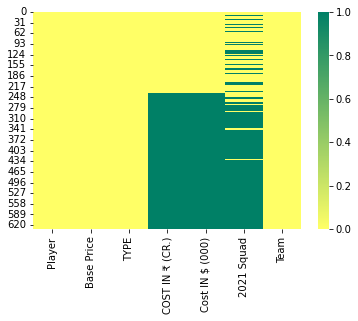

In [10]:
sns.heatmap(ipl.isnull(),cmap = 'summer_r') #using heatmap we can see null values 

In [11]:
#now we will fill the null valuse as 0
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)

In [12]:
ipl[ipl['2021 Squad'].isnull()] #to find the unsold players in 2021

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


<AxesSubplot:>

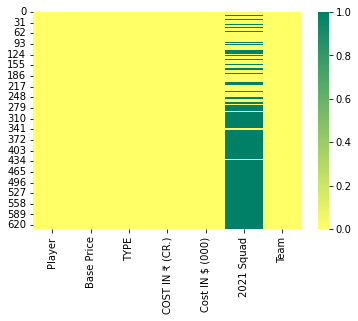

In [13]:
sns.heatmap(ipl.isnull(),cmap='summer_r')

In [14]:
# we will replace the null values as not participated
ipl['2021 Squad'] = ipl['2021 Squad'].fillna('Not participated')

<AxesSubplot:>

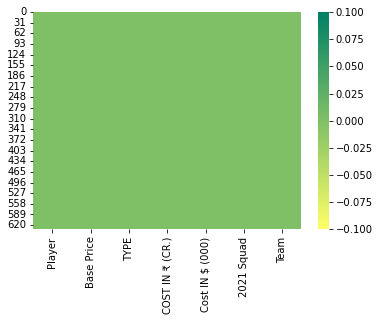

In [15]:
sns.heatmap(ipl.isnull(),cmap= 'summer_r') #now we have no null values

In [16]:
teams = ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
print(teams)

['Gujarat Titans' 'Chennai Super Kings' 'Delhi Capitals'
 'Kolkata Knight Riders' 'Punjab Kings' 'Lucknow Super Giants'
 'Mumbai Indians' 'Royal Challengers Bangalore' 'Rajasthan Royals'
 'Sunrisers Hyderabad']


In [17]:
ipl['status'] = ipl['Team'].replace(teams,'sold') #we are creating a new column as status that shows sold and unsold players

In [18]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold


In [19]:
# to check duplicate player 
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold


In [20]:
# How many players have participated in 2022 IPL Auction?
ipl.shape[0]

633

In [21]:
# How many types of players have participated?
Players_types = ipl['TYPE'].value_counts()
Players_types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

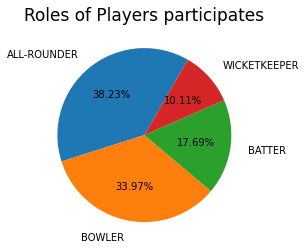

In [22]:
#pie chart
plt.pie(Players_types.values, labels= Players_types.index,labeldistance=1.2,autopct='%1.2f%%',startangle=60,)
plt.title('Roles of Players participates', fontsize =17)
plt.plot()

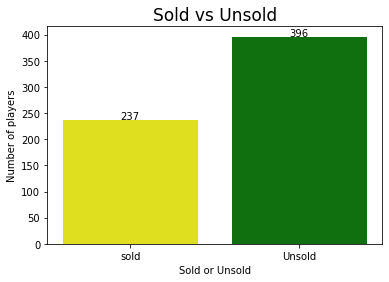

In [23]:
# players sold and unsold - in bar graph
plot=sns.countplot(ipl['status'],palette=['yellow','green'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of players')
plt.title('Sold vs Unsold', fontsize = 17)
plt.plot()

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + 
    p.get_width()/2., p.get_height()), ha ='center', va = 'center',
    xytext = (0,4), textcoords = 'offset points')


In [24]:
ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

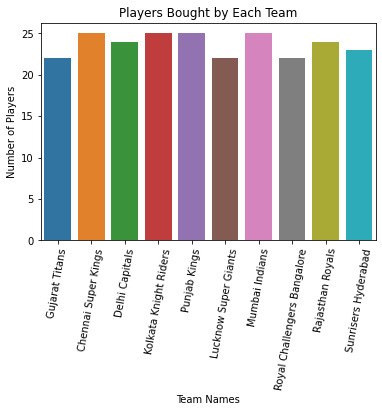

In [25]:
# Total number of players bought by each team.

team = sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players Bought by Each Team',fontsize=12)
plt.xticks(rotation=80)
plt.show()

for p in team.patches:
    team.annotate(format(p.get_height(), '.0f'), (p.get_x() +
    p.get_width()/2., p.get_height()), ha = 'center' , va = 'center',
    xytext= (0,4), textcoords = 'offset points')

In [26]:
ipl['retention'] = ipl['Base Price']

In [27]:
ipl['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 lakh', '50 lakh', '30 lakh', '1.5 Cr'],'From Auction', inplace = True)

In [28]:
ipl['Base Price'].replace('Draft Pick',0, inplace = True)

In [29]:
ipl['base_price_unit'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [30]:
ipl['base_price_unit'].replace('Retained',0,inplace=True)

In [31]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0
...,...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20


In [32]:
#total players retained and bought
ipl.groupby(['Team', 'retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          30 Lakh          1
                             50 Lakh          3
                             From Auction    17
                             Retained         4
Delhi Capitals               50 Lakh          5
                             75 Lakh          1
                             From Auction    14
                             Retained         4
Gujarat Titans               30 Lakh          1
                             50 Lakh          3
                             75 Lakh          2
                             Draft Pick       3
                             From Auction    13
Kolkata Knight Riders        30 Lakh          1
                             50 Lakh          1
                             From Auction    19
                             Retained         4
Lucknow Super Giants         50 Lakh          4
                             75 Lakh          1
                             Draft Pick       

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Royal Challengers Bangalore'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Sunrisers Hyderabad')])

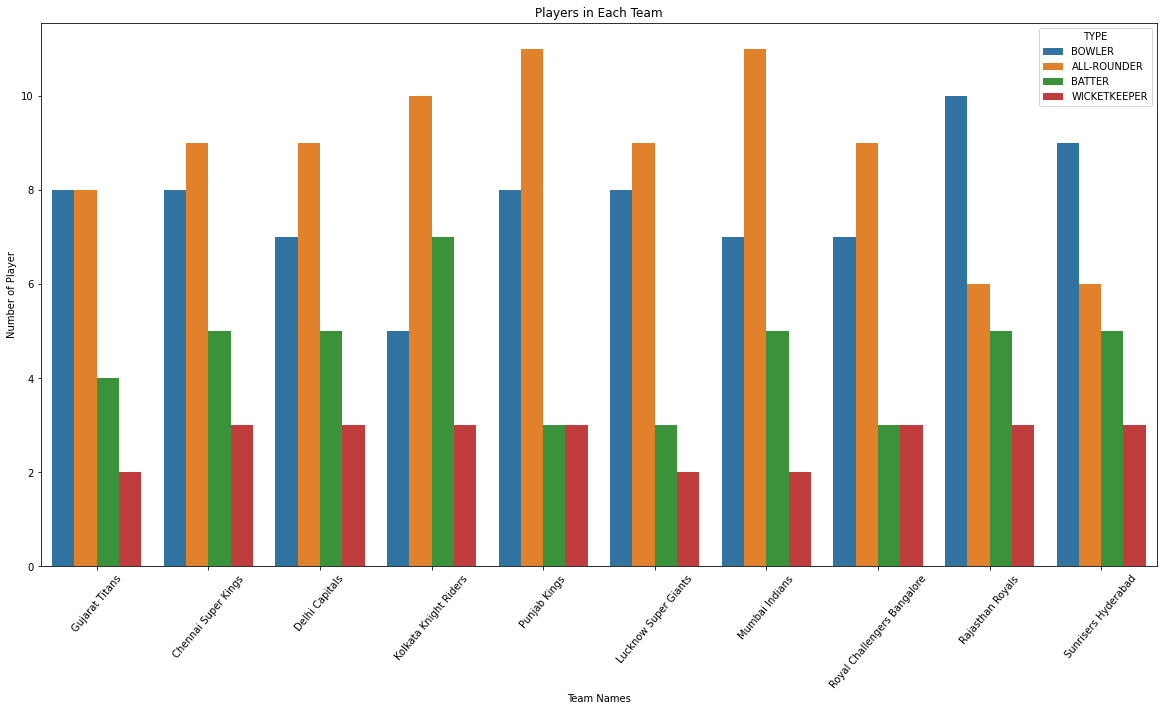

In [33]:
plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE'])
plt.title('Players in Each Team')
plt.xlabel('Team Names')
plt.ylabel('Number of Player')
plt.xticks(rotation=50)

In [34]:
# Highest amount spent on a single player by each team
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending = False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [35]:
# player retained at maximum price
ipl[ipl['retention']=='Retained'].sort_values(by ='COST IN ₹ (CR.)', ascending = False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,0,Retained


In [36]:
# top 5 Bowlers
ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='BOWLER')].sort_values( by = 'COST IN ₹ (CR.)', ascending = False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,sold,From Auction,Cr,2
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,sold,From Auction,Cr,1
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,sold,From Auction,Lakh,20


In [37]:
# top 5 batter
ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='BATTER')].sort_values( by = 'COST IN ₹ (CR.)', ascending = False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,sold,From Auction,Cr,2
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,sold,From Auction,Lakh,40
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,sold,From Auction,Cr,1.5
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,sold,From Auction,Cr,2
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,sold,From Auction,Cr,2


In [43]:
ipl = ipl.rename(columns={'2021 Squad':'prev_team'}) #renaming the 2021 squad column to prev_team

In [44]:
unsold_players = ipl[(ipl.prev_team != 'Not Participated')
                    & (ipl.Team == 'Unsold')][['Player','prev_team']]

In [42]:
unsold_players

,Player,prev_team
237,Suresh Raina,CSK
238,Steve Smith,DC
239,Shakib Al Hasan,KKR
240,Amit Mishra,DC
241,Adil Rashid,PBKS
...,...,...
628,Sairaj Patil,Not participated
629,Monu Singh,Not participated
630,Nivethan Radhakrishnan,Not participated
631,Lance Morris,Not participated
